## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Searbon, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [9]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


In [10]:
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


In [118]:
commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

commune_pop

,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
0,Suisse 2),8419550,87381,66971,20410,681011,635063,45948,-1778,8484130,64580,0.767024
1,- Zürich,1487969,17070,11076,5994,120593,108666,11927,-1544,1504346,16377,1.100628
2,>> Bezirk Affoltern,52904,517,310,207,4501,3862,639,21,53771,867,1.638817
3,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
4,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,......6806 Vendlincourt,557,7,5,2,33,34,-1,-1,557,0,0.000000
2403,......6807 Basse-Allaine,1225,6,14,-8,64,59,5,-10,1212,-13,-1.061224
2404,......6808 Clos du Doubs,1321,11,16,-5,69,72,-3,-10,1303,-18,-1.362604
2405,......6809 Haute-Ajoie,941,8,7,1,68,63,5,1,948,7,0.743889


In [119]:
pop_per_commune

,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
3,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
4,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227
5,......0003 Bonstetten,5435,47,25,22,374,322,52,3,5512,77,1.416743
6,......0004 Hausen am Albis,3571,27,20,7,298,217,81,5,3664,93,2.604313
7,......0005 Hedingen,3687,31,20,11,224,231,-7,3,3694,7,0.189856
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,......6806 Vendlincourt,557,7,5,2,33,34,-1,-1,557,0,0.000000
2403,......6807 Basse-Allaine,1225,6,14,-8,64,59,5,-10,1212,-13,-1.061224
2404,......6808 Clos du Doubs,1321,11,16,-5,69,72,-3,-10,1303,-18,-1.362604
2405,......6809 Haute-Ajoie,941,8,7,1,68,63,5,1,948,7,0.743889


### Note:
#### In case you have trouble opening the "communes_pop.xls" file, try installing an input library: "pip install openpyxl"

In [11]:
# This is a helper bootstrapping function you can use in this exercise to obtain 95% confidence
# intervals around the estimated average. The underlying concept will be explained in the next week's lecture.

# Input: your array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

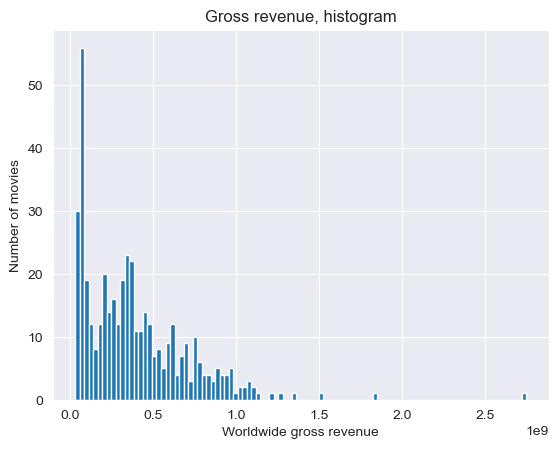

In [11]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

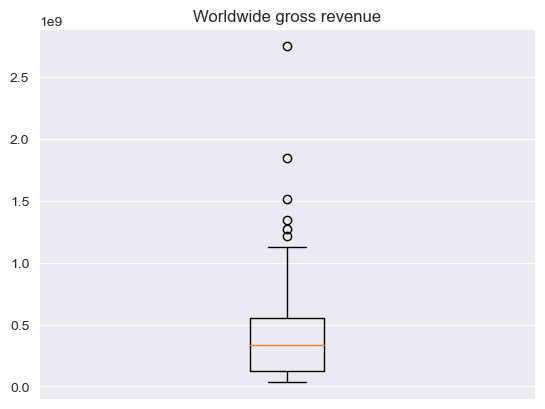

In [14]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

Text(0, 0.5, 'IMDB rating')

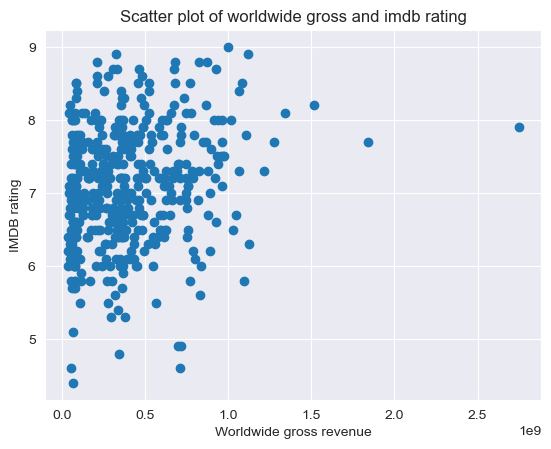

In [16]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.title('Scatter plot of worldwide gross and imdb rating')
plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

Text(0, 0.5, 'IMDB rating')

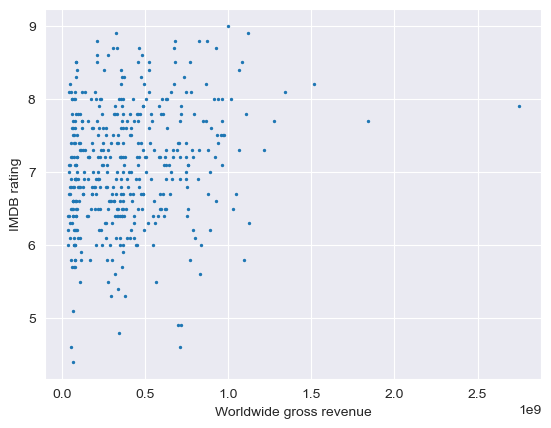

In [17]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions.

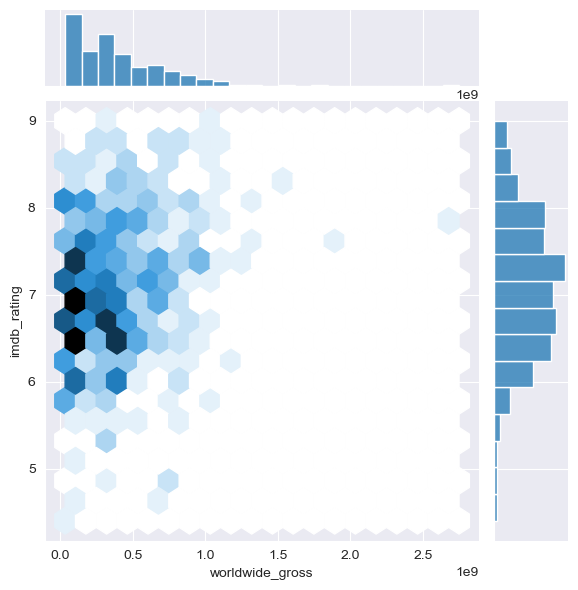

In [19]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="hex")

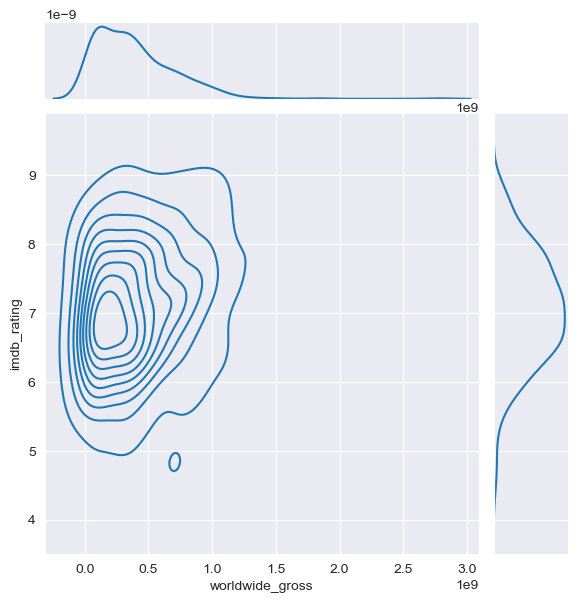

In [27]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")

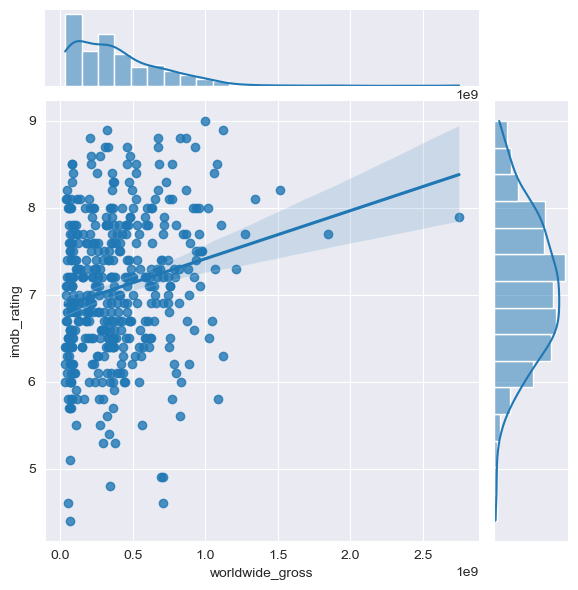

In [29]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

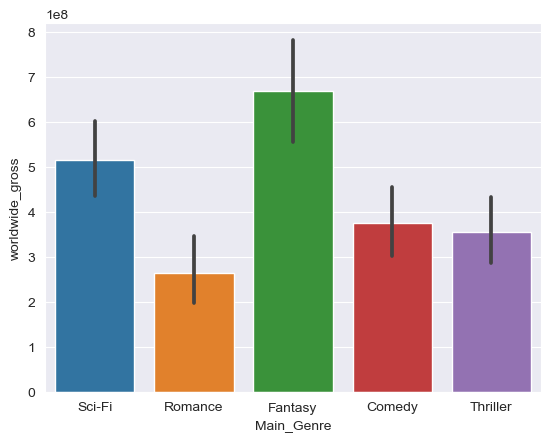

In [20]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

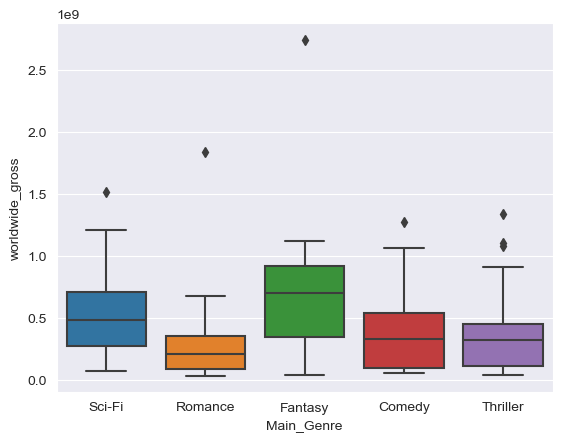

In [21]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

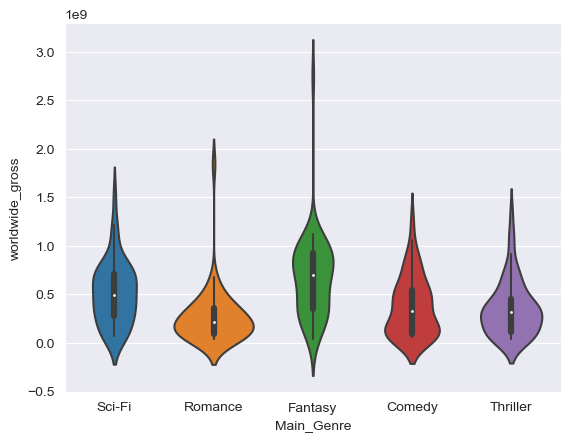

In [22]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the upper and lower bound. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions. You can use the provided "bootstrap_CI" function to create confidence intervals.

- Did the average revenue increase/decrease over time? What do you observe?



<br>


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>

In [25]:
# This is a helper bootstrapping function you can use in this exercise to obtain 95% confidence
# intervals around the estimated average. The underlying concept will be explained in the next week's lecture.

# Input: your array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices]
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [26]:
# Calculate yearly stats across movies here
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


In [38]:
stats_worldwide_gross = movies.groupby(movies.year).apply(lambda x: pd.Series({
    'Average worldwide gross': x.worldwide_gross.mean(),
    'Lower error gross': bootstrap_CI(x.worldwide_gross, 1000)[0],
    'Upper error gross': bootstrap_CI(x.worldwide_gross, 1000)[1],
}))
stats_worldwide_gross

,Average worldwide gross,Lower error gross,Upper error gross
year,,,
1975,4.096674e+07,3.691793e+07,4.552160e+07
1976,6.642076e+07,5.518965e+07,8.143624e+07
1977,9.808576e+07,5.915672e+07,1.535427e+08
1978,8.944416e+07,6.815859e+07,1.113040e+08
1979,8.086015e+07,7.466433e+07,8.764928e+07
1980,8.873752e+07,6.844776e+07,1.179343e+08
1981,8.992104e+07,6.353062e+07,1.206844e+08
1982,1.256980e+08,8.355719e+07,1.849846e+08
1983,9.525617e+07,7.134197e+07,1.341306e+08


Text(0, 0.5, 'Worldwide gross revenue')

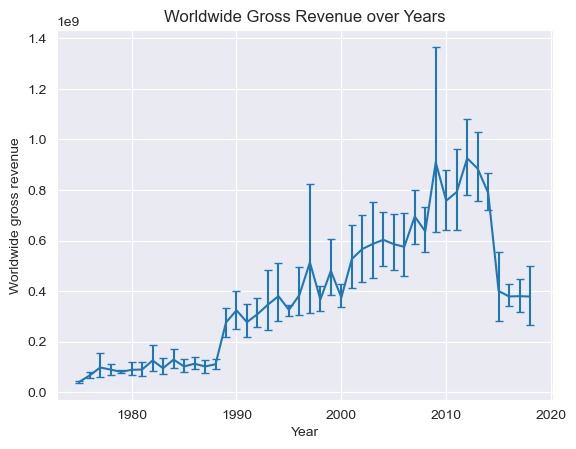

In [39]:
# Write your code to make plot with errorbars here
plt.errorbar(x=stats_worldwide_gross.index, y=stats_worldwide_gross['Average worldwide gross'],
             yerr=[-stats_worldwide_gross['Lower error gross'] + stats_worldwide_gross['Average worldwide gross'],
                   -stats_worldwide_gross['Average worldwide gross'] + stats_worldwide_gross['Upper error gross']
                   ],
             capsize=3)
plt.title('Worldwide Gross Revenue over Years')
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

Text(0, 0.5, 'Worldwide gross revenue')

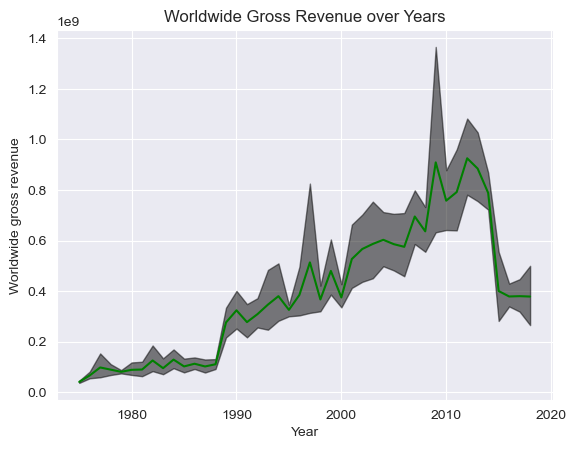

In [44]:
# Write your code to make filled plot here
plt.fill_between(x=stats_worldwide_gross.index,
                 y1=stats_worldwide_gross['Lower error gross'],
                 y2=stats_worldwide_gross['Upper error gross'],
                 alpha = 0.5, color='black')
plt.plot(stats_worldwide_gross['Average worldwide gross'], color='green')
plt.title('Worldwide Gross Revenue over Years')
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

In [16]:
# Write your interpretation here

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.



<img src="figure3.jpg" style="width: 500px;" align="left">

In [96]:
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,41833347.0,1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,39000000.0,1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,36853000.0,1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose",35000000.0,1975


In [79]:
movies.length.max()

201

In [47]:
# Calculate stats by genre here
stats_movies_length = movies.groupby(movies.Main_Genre).apply(lambda x: pd.Series({
    'Length': x.length.values
}))
stats_movies_length

,Length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."
Drama,"[152, 187, 127, 155, 143, 130, 88, 124, 113, 8..."
Family,"[150, 88, 91, 103, 125, 120, 142, 103, 93, 102..."
Fantasy,"[144, 97, 142, 161, 143, 112, 169, 115, 136, 1..."
History,"[154, 140, 195, 27, 132]"


Text(0, 0.5, 'Number of movies')

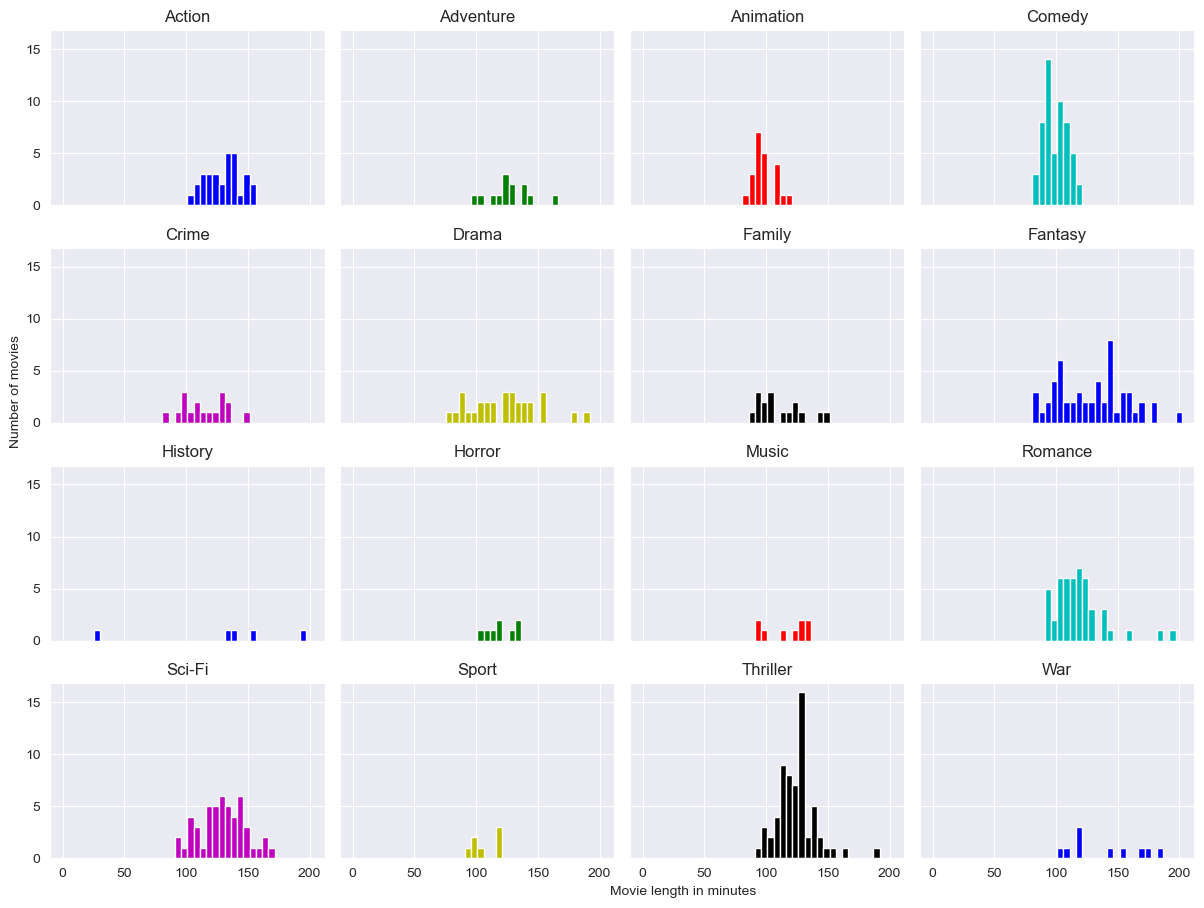

In [85]:
# Write your code to make 4x4 panel here
figs, axes = plt.subplots(4, 4, figsize=(12, 9), sharex=True, sharey=True)
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']

for i in range(16):
    sub_fig = axes[np.floor(i/4).astype(int), i%4]
    sub_fig.hist(stats_movies_length.iloc[i].values, range=(0, 202), bins=40, color=color_list[i])
    sub_fig.set_title(stats_movies_length.index[i])

figs.tight_layout()

figs.text(0.5, 0, 'Movie length in minutes')
figs.text(0, 0.5, 'Number of movies', rotation=90)

In [63]:
# Write your interpretation here
print("The longest movie belongs to the genre: {}".format(movies[movies.length == movies.length.max()]['Main_Genre'].values))

The longest movie belongs to the genre: ['Fantasy']


In [74]:
stats_movies_length_mean = movies.groupby(movies.Main_Genre).apply(lambda x: pd.Series({
    'Length': x.length.mean()
}))
stats_movies_length_mean[stats_movies_length_mean.index == 'Animation']

,Length
Main_Genre,
Animation,98.227273


In [75]:
stats_movies_length_mean[stats_movies_length_mean.index == 'Comedy']

,Length
Main_Genre,
Comedy,99.4


## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?

<img src="figure4.jpg" style="width: 500px;" align="left">

In [95]:
# Write your code to make the first heatmap here
df2 = pd.crosstab(movies['Main_Genre'],movies['studio'])
df2.max().max()

18

<AxesSubplot:xlabel='studio', ylabel='Main_Genre'>

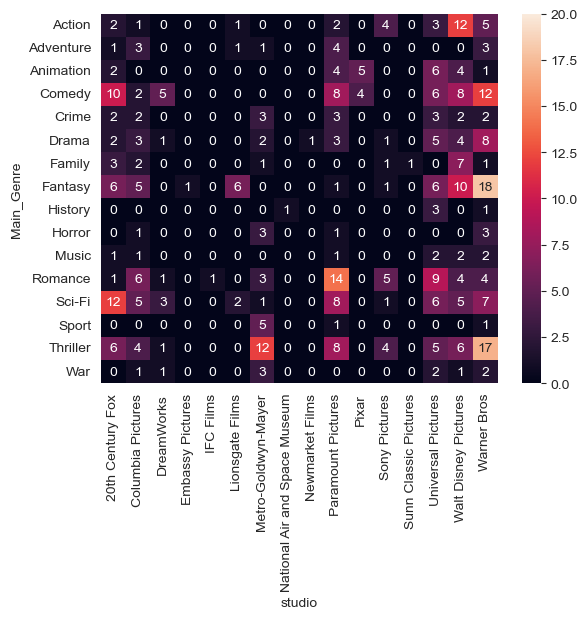

In [96]:
sns.heatmap(df2, annot=True, vmin = 0, vmax = 20)

In [115]:
df5 = pd.crosstab(movies['Main_Genre'],movies['studio'], values=movies['worldwide_gross'],
                  margins=False, aggfunc='mean')
df5

studio,20th Century Fox,Columbia Pictures,DreamWorks,Embassy Pictures,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,National Air and Space Museum,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Sunn Classic Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros
Main_Genre,,,,,,,,,,,,,,,,
Action,3.407811e+08,213030843.0,NaN,NaN,NaN,2.817239e+08,NaN,NaN,NaN,2.000147e+08,NaN,3.000318e+08,NaN,4.740157e+08,4.861896e+08,3.127741e+08
Adventure,2.093980e+08,832115506.0,NaN,NaN,NaN,8.649130e+08,5.860907e+08,NaN,NaN,4.119583e+08,NaN,NaN,NaN,NaN,NaN,4.271563e+08
Animation,7.738138e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.990540e+08,548300960.8,NaN,NaN,4.588876e+08,4.422954e+08,3.843356e+08
Comedy,2.978456e+08,371391557.0,620632365.6,NaN,NaN,NaN,NaN,NaN,NaN,2.758723e+08,646646617.0,NaN,NaN,1.676451e+08,6.694032e+08,2.282795e+08
Crime,2.646433e+08,187319778.0,NaN,NaN,NaN,NaN,2.880372e+08,NaN,NaN,1.037632e+08,NaN,NaN,NaN,1.084401e+08,1.140386e+08,4.464522e+08
Drama,2.472080e+08,152138803.0,457640427.0,NaN,NaN,NaN,2.985171e+08,NaN,611899420.0,1.344081e+08,NaN,2.066784e+08,NaN,1.678891e+08,4.496894e+08,3.267087e+08
Family,4.256552e+08,73937280.5,NaN,NaN,NaN,NaN,6.520000e+07,NaN,NaN,NaN,NaN,3.008548e+08,55700000.0,NaN,2.567674e+08,6.138968e+07
Fantasy,9.301601e+08,554470131.8,NaN,42365581.0,NaN,5.850039e+08,NaN,NaN,NaN,1.915024e+08,NaN,2.627972e+08,NaN,3.847067e+08,7.439514e+08,7.792934e+08
History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86600000.0,NaN,NaN,NaN,NaN,NaN,2.393325e+08,NaN,4.567590e+08


<AxesSubplot:xlabel='studio', ylabel='Main_Genre'>

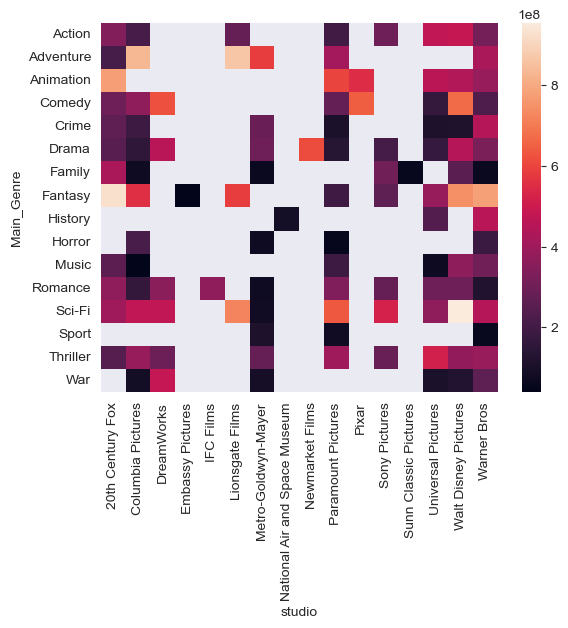

In [116]:
sns.heatmap(df5, annot=False)

In [104]:
# Write your code to make the second heatmap here
df3 = pd.crosstab(movies['Main_Genre'],movies['Genre_2'], values = movies['worldwide_gross'],
                  margins=False, aggfunc='sum')
df3

Genre_2,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Western
Main_Genre,,,,,,,,,,,,,,,,,
Action,NaN,1.017030e+10,NaN,8.982109e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.613360e+08,NaN
Adventure,5.548924e+09,NaN,NaN,1.748035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.649130e+08,NaN
Animation,9.498500e+08,4.080407e+09,1.366013e+09,4.082768e+09,NaN,NaN,NaN,8.427573e+08,NaN,NaN,NaN,270395425.0,NaN,NaN,NaN,NaN,NaN
Comedy,5.408239e+08,3.190899e+09,1.378162e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179033791.0
Crime,NaN,1.757016e+09,NaN,1.768613e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,4.576404e+08,2.587903e+09,1.562897e+09,3.081770e+08,1.521698e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458881948.0
Family,NaN,4.196656e+08,3.043203e+08,1.806537e+09,NaN,55700000.0,1.082281e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36853000.0
Fantasy,6.243867e+08,2.042598e+10,NaN,9.653801e+08,3.515834e+08,NaN,3.549738e+09,1.021797e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
History,NaN,NaN,NaN,NaN,NaN,86600000.0,1.174757e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Genre_2', ylabel='Main_Genre'>

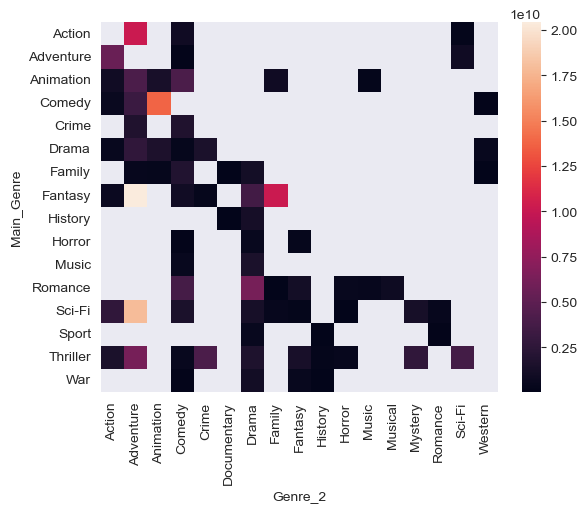

In [106]:
sns.heatmap(df3, annot=False)

In [108]:
# Write your code to make the second heatmap here
df4 = pd.crosstab(movies['Main_Genre'],movies['Genre_2'], values = movies['worldwide_gross'],
                  margins=False, aggfunc='mean')
df4

Genre_2,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Western
Main_Genre,,,,,,,,,,,,,,,,,
Action,NaN,4.068119e+08,NaN,2.994036e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.613360e+08,NaN
Adventure,554892407.3,NaN,NaN,1.748035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.649130e+08,NaN
Animation,474924996.0,6.800678e+08,4.553378e+08,5.103460e+08,NaN,NaN,NaN,4.213786e+08,NaN,NaN,NaN,270395425.0,NaN,NaN,NaN,NaN,NaN
Comedy,108164777.2,2.659082e+08,6.562677e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179033791.0
Crime,NaN,3.514032e+08,NaN,1.473844e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,457640427.0,3.697004e+08,5.209658e+08,7.704424e+07,3.043395e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229440974.0
Family,NaN,4.196656e+08,3.043203e+08,2.580768e+08,NaN,55700000.0,2.164561e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36853000.0
Fantasy,624386746.0,8.170391e+08,NaN,1.930760e+08,3.515834e+08,NaN,5.916229e+08,6.386231e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
History,NaN,NaN,NaN,NaN,NaN,86600000.0,2.936891e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Genre_2', ylabel='Main_Genre'>

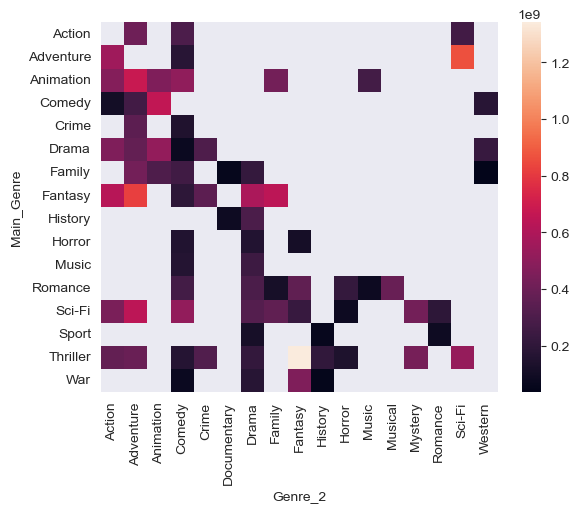

In [109]:
sns.heatmap(df4, annot=False)

In [22]:
# Write your interpretations here

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

In [23]:
# Write your dataviz show-off code here

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

In [120]:
# Write your code here
pop_per_commune

,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
3,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
4,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227
5,......0003 Bonstetten,5435,47,25,22,374,322,52,3,5512,77,1.416743
6,......0004 Hausen am Albis,3571,27,20,7,298,217,81,5,3664,93,2.604313
7,......0005 Hedingen,3687,31,20,11,224,231,-7,3,3694,7,0.189856
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,......6806 Vendlincourt,557,7,5,2,33,34,-1,-1,557,0,0.000000
2403,......6807 Basse-Allaine,1225,6,14,-8,64,59,5,-10,1212,-13,-1.061224
2404,......6808 Clos du Doubs,1321,11,16,-5,69,72,-3,-10,1303,-18,-1.362604
2405,......6809 Haute-Ajoie,941,8,7,1,68,63,5,1,948,7,0.743889


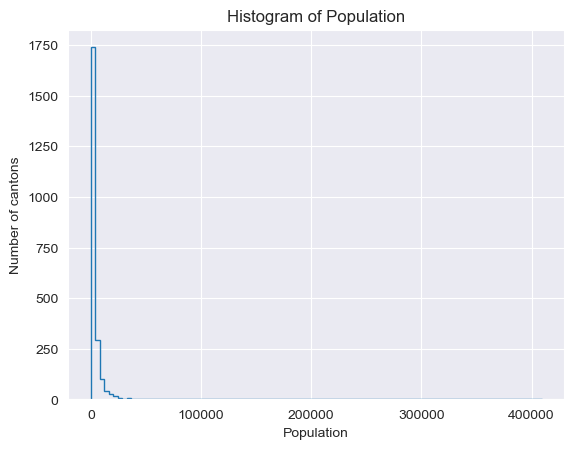

In [127]:
pop_per_commune.population_Dec.hist(bins=100, histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()



__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?


<img src="plaw.png" style="width: 600px;" align="left">

The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

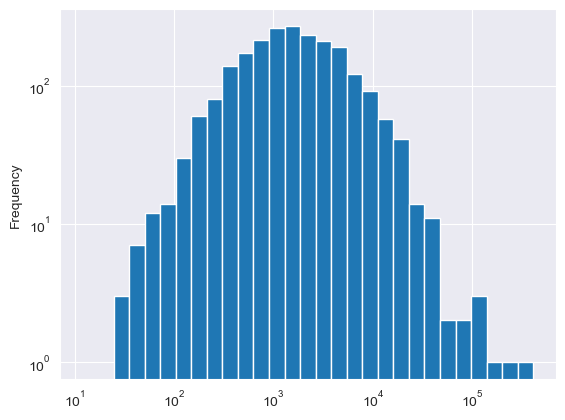

In [207]:
logspace_min = np.log10(pop_per_commune.population_Dec.min())
logspace_max = np.log10(pop_per_commune.population_Dec.max())
pop_per_commune.population_Dec.plot.hist(bins=np.logspace(logspace_min, logspace_max, 30), edgecolor='white')
plt.yscale('log')
plt.xscale('log')
plt.grid(drawstyle="steps")
plt.show()

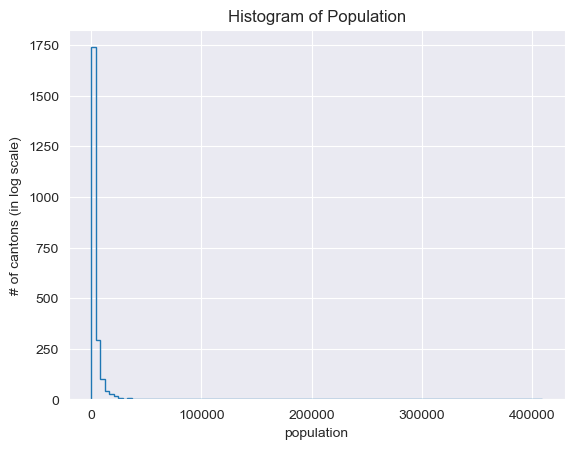

In [194]:
# Write your code here
# 没有任何处理
array_100 = plt.hist(pop_per_commune.population_Dec, bins=100, histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

In [195]:
array_100

(array([1.739e+03, 2.910e+02, 9.800e+01, 3.900e+01, 2.800e+01, 1.400e+01,
        6.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

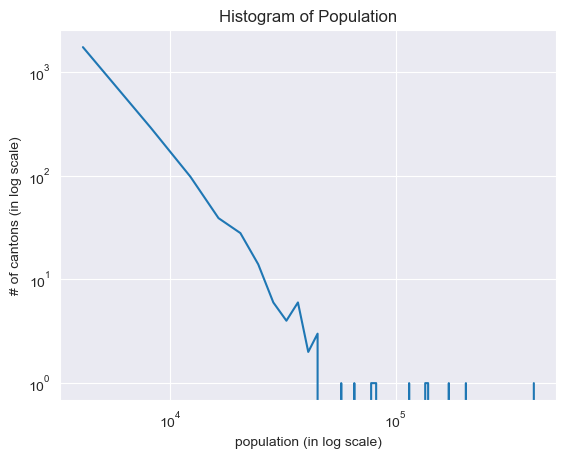

In [177]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

1.0791812460476249 5.6119791372145444


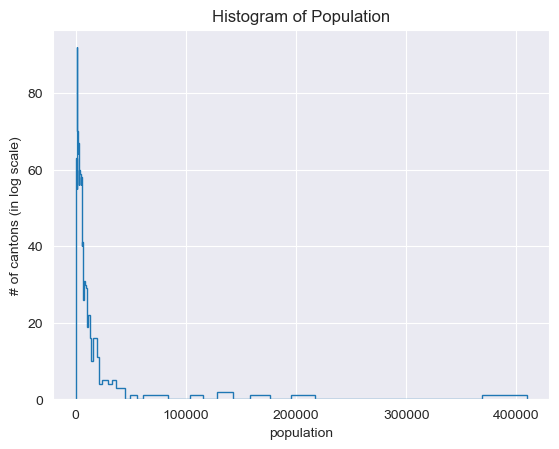

In [170]:
# Write your code here
# 对x轴的bin进行了log处理
logspace_min = np.log10(pop_per_commune.population_Dec.min())
logspace_max = np.log10(pop_per_commune.population_Dec.max())
print(logspace_min, logspace_max)
array_100 = plt.hist(pop_per_commune.population_Dec, bins=np.logspace(logspace_min, logspace_max, 100), histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

1.0791812460476249 5.6119791372145444


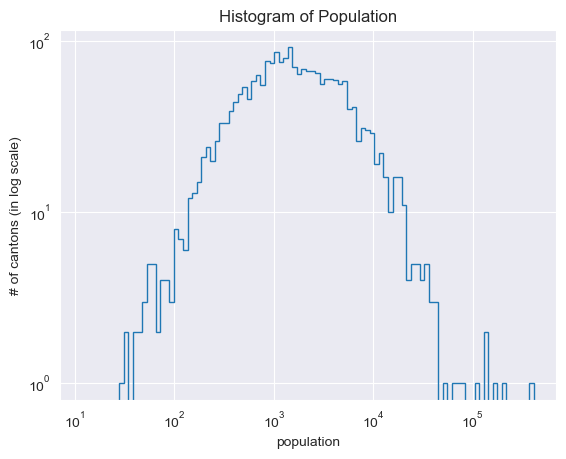

In [188]:
# Write your code here
# 对x轴的bin进行了log处理, xy 都是log
logspace_min = np.log10(pop_per_commune.population_Dec.min())
logspace_max = np.log10(pop_per_commune.population_Dec.max())
print(logspace_min, logspace_max)
array_100 = plt.hist(pop_per_commune.population_Dec, bins=np.logspace(logspace_min, logspace_max, 100), histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

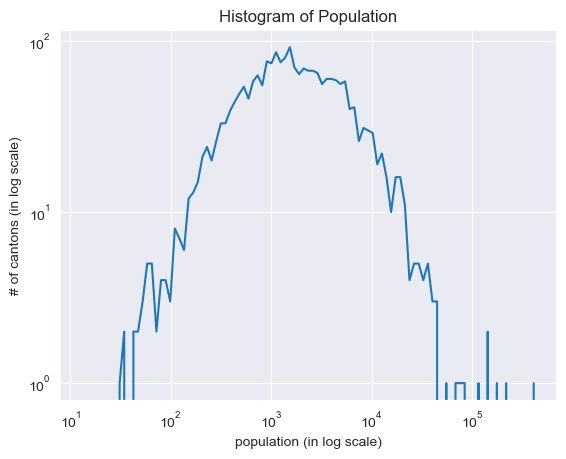

In [171]:
# 对x轴的bin进行了log处理, xy 都是log
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

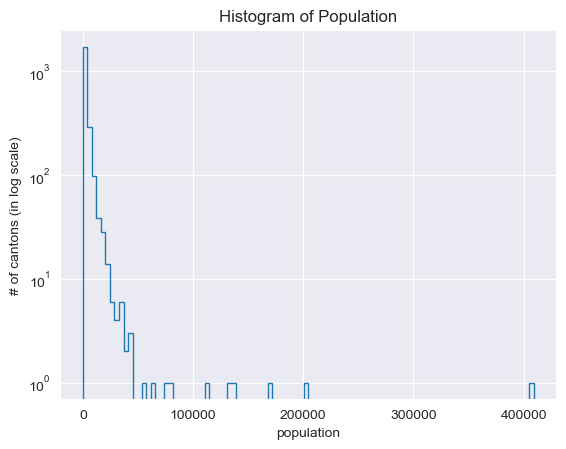

In [192]:
# Write your code here
# 对y轴log处理
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

In [193]:
array_100

(array([1.739e+03, 2.910e+02, 9.800e+01, 3.900e+01, 2.800e+01, 1.400e+01,
        6.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

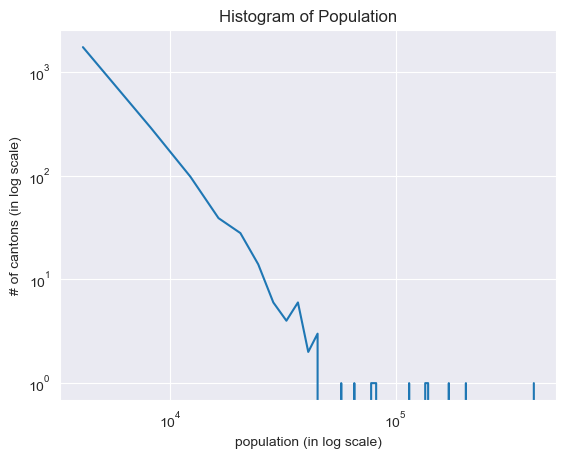

In [179]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

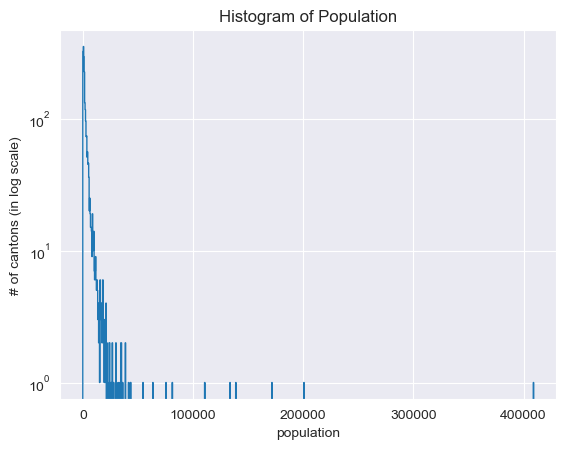

In [180]:
# 对y轴log处理
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

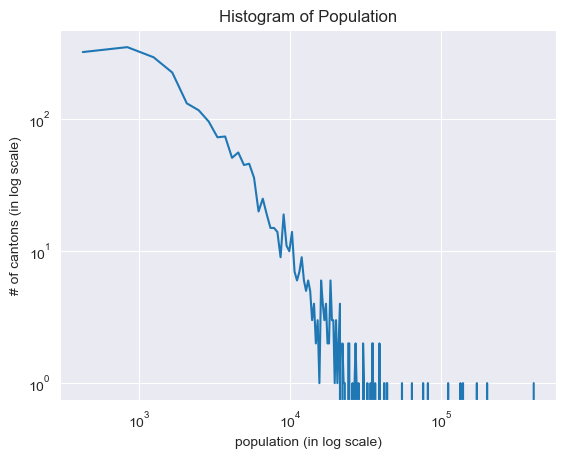

In [181]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

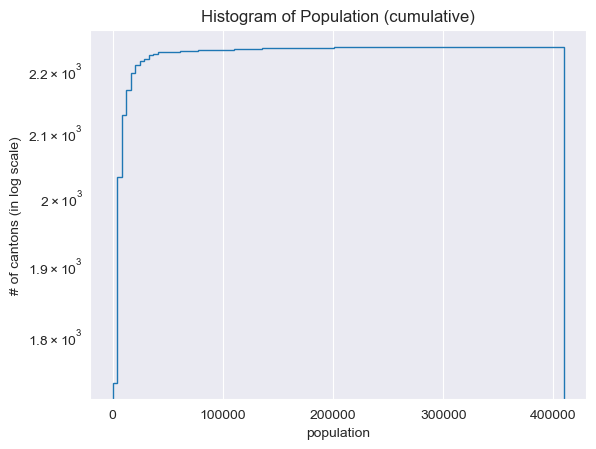

In [204]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

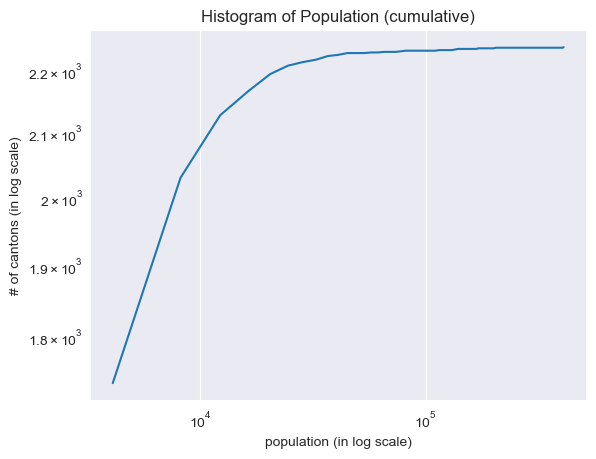

In [205]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

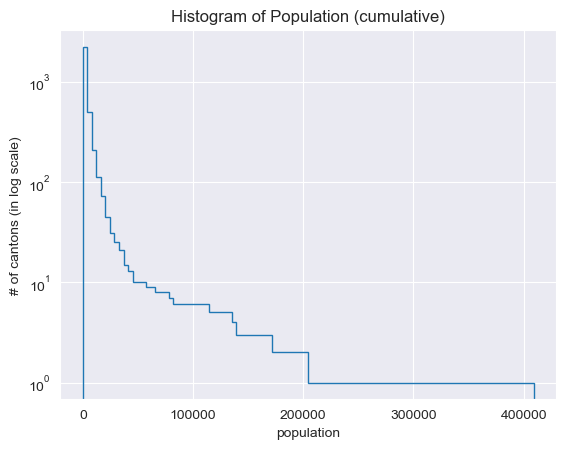

In [198]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

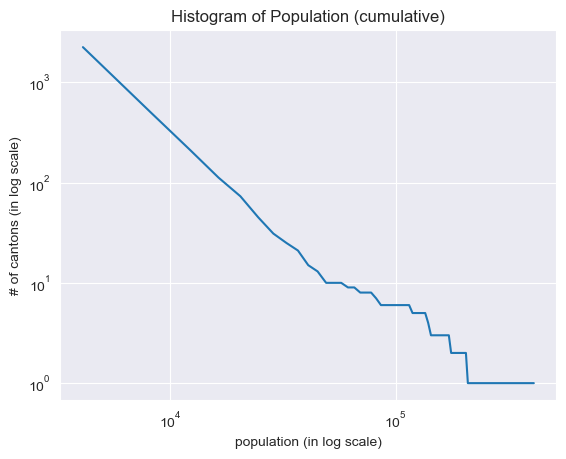

In [199]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

In [26]:
# Write your interpretations here

1.0791812460476249 5.6119791372145444


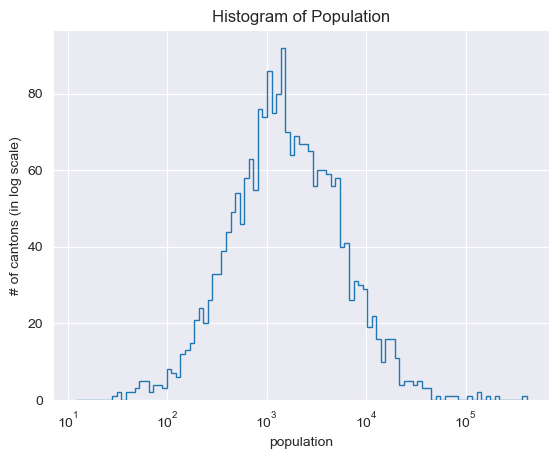

In [203]:
# Write your code here
# 对x轴的bin进行了log处理
logspace_min = np.log10(pop_per_commune.population_Dec.min())
logspace_max = np.log10(pop_per_commune.population_Dec.max())
print(logspace_min, logspace_max)
array_100 = plt.hist(pop_per_commune.population_Dec, bins=np.logspace(logspace_min, logspace_max, 100), histtype='step')
plt.xscale('log')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

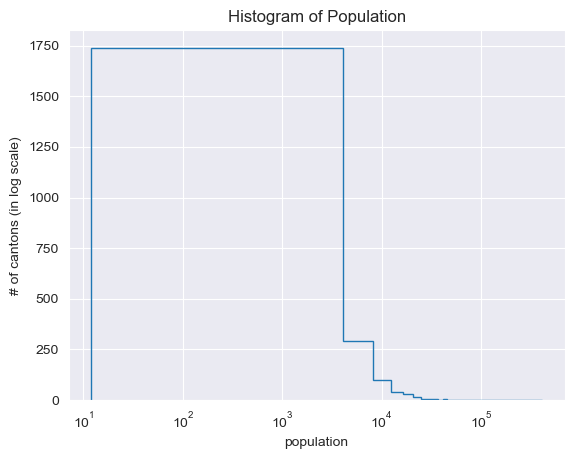

In [202]:
# Write your code here
# 没有任何处理
array_100 = plt.hist(pop_per_commune.population_Dec, bins=100, histtype='step')
plt.xscale('log')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()